   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

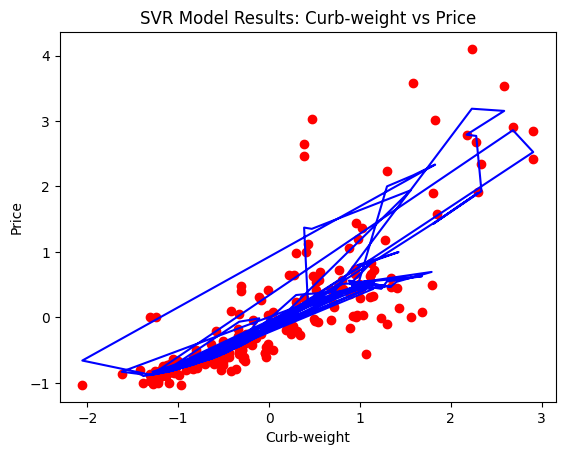

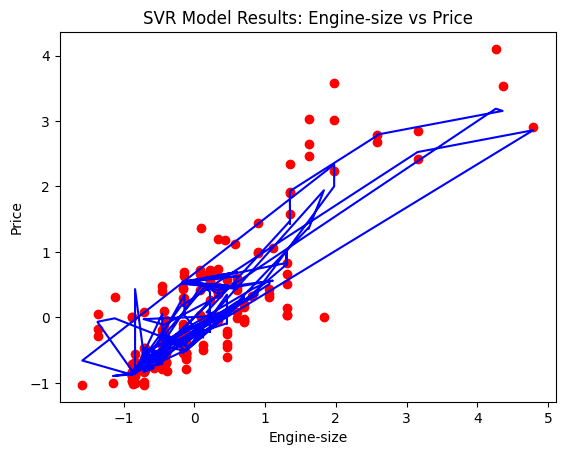

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the dataset (ensure the dataset is in the current directory)
dataset = pd.read_csv("/content/Automobile_data.csv")

# Preview the first few rows of the dataset to understand its structure
print(dataset.head())

# --- Data Preprocessing ---
# We need to handle missing values and encode categorical variables first
# For simplicity, let's work with a few numeric columns: 'curb-weight' and 'engine-size' for feature extraction
# The target variable will be 'price'

# Clean data: Convert non-numeric values to NaN, and then fill missing values
dataset['curb-weight'] = pd.to_numeric(dataset['curb-weight'], errors='coerce')
dataset['engine-size'] = pd.to_numeric(dataset['engine-size'], errors='coerce')
dataset['price'] = pd.to_numeric(dataset['price'], errors='coerce')

# Fill missing values with mean (for numeric columns)
dataset['curb-weight'].fillna(dataset['curb-weight'].mean(), inplace=True)
dataset['engine-size'].fillna(dataset['engine-size'].mean(), inplace=True)
dataset['price'].fillna(dataset['price'].mean(), inplace=True)

# Select the features (independent variables) and the target (dependent variable)
X = dataset[['curb-weight', 'engine-size']].values  # Features: 'curb-weight', 'engine-size'
y = dataset['price'].values  # Target: 'price'

# --- Feature Scaling ---
# Standardize the features and the target variable
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1, 1))

# --- Train SVR Model ---
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y.ravel())  # Train the SVR model

# Predict a new result (inverse transform the prediction to get original scale)
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[2000, 160]])).reshape(-1, 1))

print(f"Predicted Price for car with curb-weight 2000 and engine-size 160: {y_pred[0][0]}")

# --- Model Accuracy (R^2 Score) ---
accuracy = regressor.score(X, y)  # This gives the R^2 score
print('Accuracy (R^2 Score) of the model is', accuracy * 100, '%')

# --- Visualize the Results ---
# Visualize the SVR model results for 'curb-weight' vs 'price'
plt.scatter(X[:, 0], y, color="red")  # 'curb-weight' vs 'price'
plt.plot(X[:, 0], regressor.predict(X), color="blue")  # SVR predicted line
plt.title("SVR Model Results: Curb-weight vs Price")
plt.xlabel("Curb-weight")
plt.ylabel("Price")
plt.show()

# Visualize the SVR model results for 'engine-size' vs 'price'
plt.scatter(X[:, 1], y, color="red")  # 'engine-size' vs 'price'
plt.plot(X[:, 1], regressor.predict(X), color="blue")  # SVR predicted line
plt.title("SVR Model Results: Engine-size vs Price")
plt.xlabel("Engine-size")
plt.ylabel("Price")
plt.show()


   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

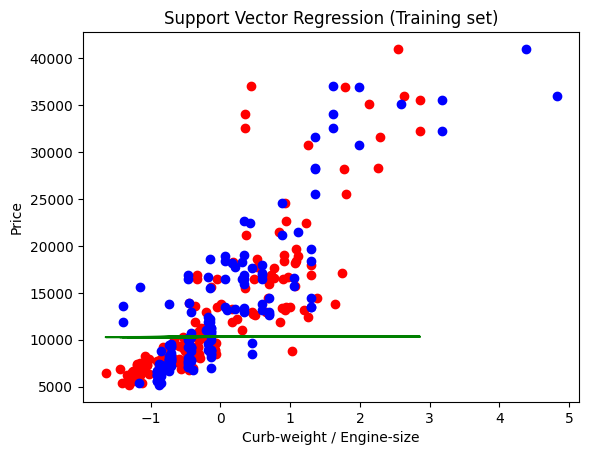

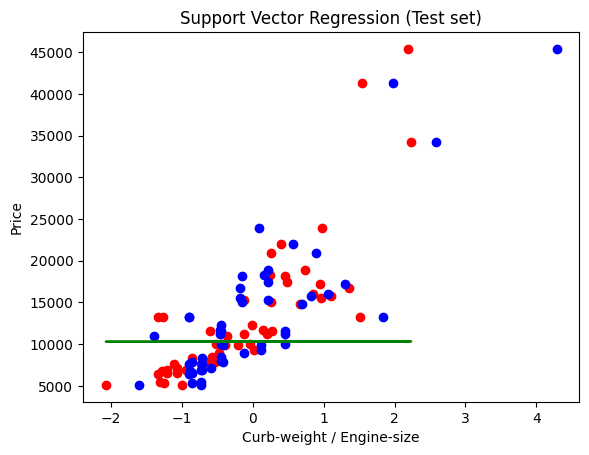

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
dataset = pd.read_csv("/content/Automobile_data.csv")

# Preview the dataset to understand its structure
print(dataset.head())

# --- Data Preprocessing ---
# Handle missing values: Convert columns to numeric and fill missing values
dataset['curb-weight'] = pd.to_numeric(dataset['curb-weight'], errors='coerce')
dataset['engine-size'] = pd.to_numeric(dataset['engine-size'], errors='coerce')
dataset['price'] = pd.to_numeric(dataset['price'], errors='coerce')

# Fill missing values with mean
dataset['curb-weight'].fillna(dataset['curb-weight'].mean(), inplace=True)
dataset['engine-size'].fillna(dataset['engine-size'].mean(), inplace=True)
dataset['price'].fillna(dataset['price'].mean(), inplace=True)

# --- Feature Selection ---
# Select features (e.g., 'curb-weight' and 'engine-size') and target ('price')
X = dataset[['curb-weight', 'engine-size']].values  # Features
y = dataset['price'].values  # Target

# --- Split the dataset into training and testing sets ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# --- Feature Scaling ---
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# --- Create SVR Model ---
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)  # Train the model

# --- Predict on Test Set ---
y_pred = regressor.predict(X_test)

# --- Model Evaluation ---
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (Accuracy)
accuracy = r2_score(y_test, y_pred)
print(f"R-squared Accuracy: {accuracy*100:.2f}%")

# --- Visualizing the Results for Training Set ---
plt.scatter(X_train[:, 0], y_train, color='red')
plt.scatter(X_train[:, 1], y_train, color='blue')
plt.plot(X_train[:, 0], regressor.predict(X_train), color='green')
plt.title('Support Vector Regression (Training set)')
plt.xlabel('Curb-weight / Engine-size')
plt.ylabel('Price')
plt.show()

# --- Visualizing the Results for Test Set ---
plt.scatter(X_test[:, 0], y_test, color='red')
plt.scatter(X_test[:, 1], y_test, color='blue')
plt.plot(X_test[:, 0], regressor.predict(X_test), color='green')
plt.title('Support Vector Regression (Test set)')
plt.xlabel('Curb-weight / Engine-size')
plt.ylabel('Price')
plt.show()
